# Pooling 

A pooling layer in a convolutional neural network (CNN) is a type of layer that reduces the spatial dimensions (width and height) of the feature maps obtained after the convolutional layers. This reduction in dimensions helps to decrease the computational complexity and memory requirements of the network and also helps to control overfitting.

The pooling layer works by applying a pooling function, such as max pooling or average pooling, over a window (also known as the pooling kernel) on the feature map. The window moves over the input feature map, and at each position, the pooling function calculates a single output value by applying a mathematical operation to the values in the window.

Max pooling takes the maximum value in each window, while average pooling takes the average value. The output of the pooling layer is a downsampled version of the input feature map, where each output value represents a summary of the information in the corresponding window of the input feature map.

Overall, the pooling layer helps to reduce the size of the feature maps, which can lead to faster training and better generalization performance of the model.

**Note**
* This notebook is higly inspired by this [stackoverflow answer](https://stackoverflow.com/questions/54962004/implement-max-mean-poolingwith-stride-with-numpy)

**KUDOS TO THE TEACHER**

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided

lets assume we have array like this 



In [12]:
sample = np.array([[12 , 20 , 30 , 8 , 12] , 
                   [8 , 12 , 2 , 0] , 
                   [34 , 70 , 37 , 4] , 
                  [112 , 100 , 25 , 12]])

<ipython-input-12-9f73db89488a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample = np.array([[12 , 20 , 30 , 8 , 12] ,


And it looks like this 

In [13]:
sample

array([list([12, 20, 30, 8, 12]), list([8, 12, 2, 0]),
       list([34, 70, 37, 4]), list([112, 100, 25, 12])], dtype=object)

If we want to get the `maximum` element of this array, we can get this by 

In [17]:
np.amax(sample)

[112, 100, 25, 12]

But what we want is something like this 

<img src = "https://production-media.paperswithcode.com/methods/MaxpoolSample2.png">

Why we want this, because talking of a big image, this technique can scale the image in small size and still capture the information in it, decreasing the computation power

Lets assume we have this image 

In [18]:
test_img = cv2.imread("/content/sample_image.jpg")

And it looks like this 

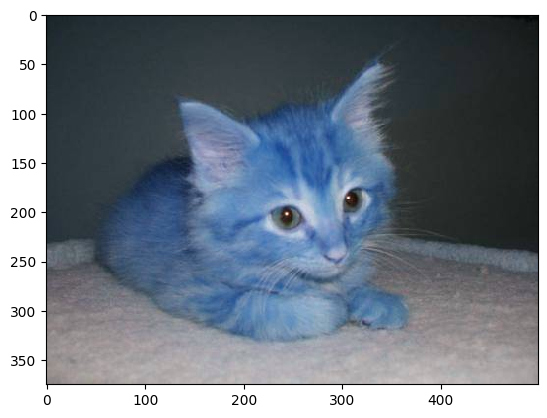

In [19]:
plt.imshow(test_img, interpolation='nearest')
plt.show()

But this is a $3$ channel image, what we want is a $1$ channel for starters

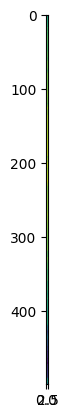

In [20]:
plt.imshow(test_img[0], interpolation='nearest')
plt.show()

That was not soemthing we expected. Most of the time in `image processing` the erorr you find will be because of the shape of the image. Lets get the image of this array

In [21]:
test_img.shape

(375, 499, 3)

The shape is of the incorrect format. The format of this image is `(height x width x depth)`. But what we want for slicing is `(depth , height , width)`. So we need to reshape it to the correct format. 

In [24]:
test = np.reshape(test_img , newshape = (3 , 375 , 499))

And this is kind of correct. 

**Note** - You now cannot plot the image, because it is in the incorrect format 

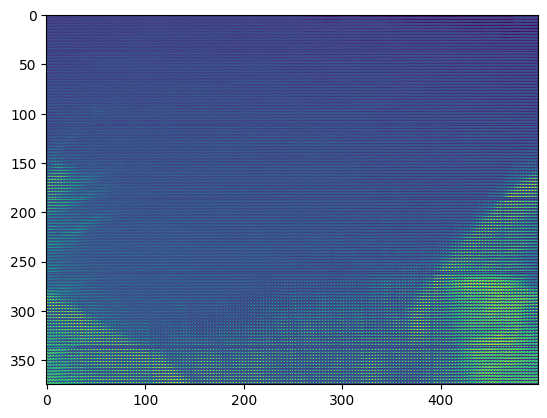

In [29]:
plt.imshow(test[0], interpolation='nearest')
plt.show()

This is still not what we want, but we can go for it

In [30]:
sample = test[0]

First we will define shapes for the output. Here we have taken the kernel to be $2$

In [46]:
output_shape = ((sample.shape[0] - 2) // 2 + 1 , 
                (sample.shape[1] - 2) // 2 + 1)

In [47]:
output_shape

(187, 249)

Then we will define the `shape` and `strides`

In [49]:
shape_w = (output_shape[0] , output_shape[1] , 2 , 2)
stride_w = (2 * sample.shape[1] , 2 , sample.shape[1] , 1)

Now we will stride the array 

In [50]:
a = as_strided(sample , shape_w , stride_w)

In [51]:
a

array([[[[ 23,  34],
         [ 51,  55]],

        [[ 38,  24],
         [ 40,  51]],

        [[ 35,  39],
         [ 55,  41]],

        ...,

        [[ 40,  51],
         [ 46,  50]],

        [[ 55,  40],
         [ 35,  46]],

        [[ 51,  55],
         [ 50,  34]]],


       [[[ 49,  34],
         [ 24,  35]],

        [[ 45,  49],
         [ 39,  24]],

        [[ 33,  44],
         [ 35,  39]],

        ...,

        [[ 26,  22],
         [ 40,  51]],

        [[ 27,  26],
         [ 55,  40]],

        [[ 22,  27],
         [ 51,  55]]],


       [[[ 51,  55],
         [ 49,  34]],

        [[ 40,  51],
         [ 45,  49]],

        [[ 55,  39],
         [ 33,  44]],

        ...,

        [[ 46,  50],
         [ 21,  17]],

        [[ 35,  46],
         [ 22,  21]],

        [[ 50,  34],
         [ 17,  22]]],


       ...,


       [[[161, 130],
         [ 42,  54]],

        [[143, 159],
         [ 60,  42]],

        [[124, 137],
         [ 54,  60]],

        ...,



Now we just need to find the max of all the arrays with a particular axises

In [52]:
a.max(axis = (2 , 3))

array([[ 55,  51,  55, ...,  51,  55,  55],
       [ 49,  49,  44, ...,  51,  55,  55],
       [ 55,  51,  55, ...,  50,  46,  50],
       ...,
       [161, 159, 137, ..., 135, 168, 167],
       [166, 158, 165, ..., 162, 142, 160],
       [167, 133, 165, ..., 161, 169, 167]], dtype=uint8)

And if we see this as an image

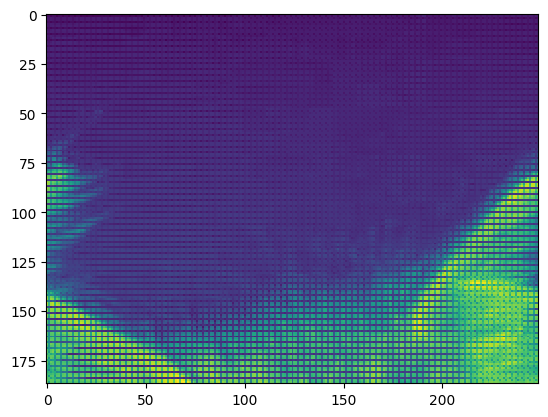

In [53]:
plt.imshow(a.max(axis = (2 , 3)), interpolation='nearest')
plt.show()

Lets now make a function for this 

In [54]:
def pool2d(image, kernel_size, stride, padding=0, pool_mode='max'):

    image = np.pad(image, padding, mode='constant')

    output_shape = ((image.shape[0] - kernel_size) // stride + 1,
                    (image.shape[1] - kernel_size) // stride + 1)
    
    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*image.strides[0], stride*image.strides[1], image.strides[0], image.strides[1])
    
    A_w = as_strided(image, shape_w, strides_w)

    if pool_mode == 'max':

        return A_w.max(axis=(2, 3))

    elif pool_mode == 'avg':

        return A_w.mean(axis=(2, 3))

And we just created our pooling function